# Some Imports 

In [84]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score, f1_score ,classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer,MinMaxScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_predict


In [3]:
df_test = pd.read_csv("C:\\Users\\Fathy\\Desktop\\customer churn project\\customer_churn_dataset-testing-master.csv")

df_train = pd.read_csv("C:\\Users\\Fathy\\Desktop\\customer churn project\\customer_churn_dataset-training-master.csv")
#df_train = df_train.dropna()
df = pd.concat( objs = [df_train,df_test],ignore_index=True)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# EDA

In [13]:
df.shape

(505207, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [12]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df["Subscription Type"].unique()

array(['Standard', 'Basic', 'Premium', nan], dtype=object)

In [7]:
df["Contract Length"].unique()

array(['Annual', 'Monthly', 'Quarterly', nan], dtype=object)

In [8]:
df["Contract Length"].value_counts()

Annual       198608
Quarterly    197364
Monthly      109234
Name: Contract Length, dtype: int64

In [9]:
df["Subscription Type"].value_counts()

Standard    170630
Premium     170099
Basic       164477
Name: Subscription Type, dtype: int64

In [10]:
df["Churn"].value_counts()

1.0    280492
0.0    224714
Name: Churn, dtype: int64

In [11]:
df["Gender"].value_counts()

Male      280273
Female    224933
Name: Gender, dtype: int64

# Data Visualization

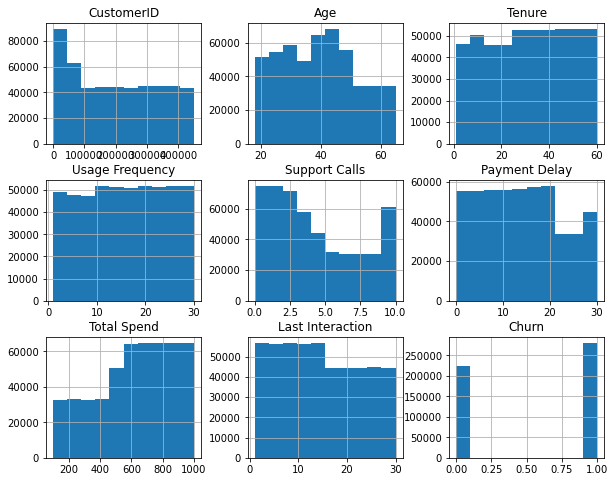

In [15]:
df.hist(figsize=(10,8));

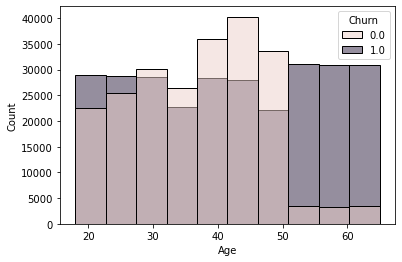

In [16]:
sns.histplot(data=df, x='Age', bins=10, hue='Churn');

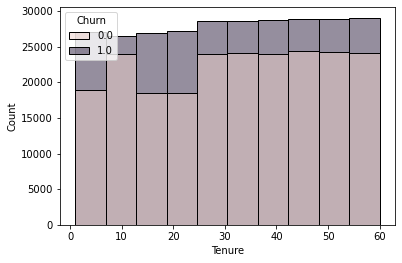

In [17]:
sns.histplot(data=df, x='Tenure', bins=10, hue='Churn');

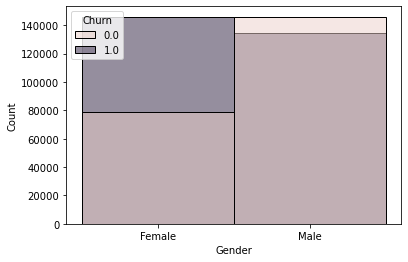

In [18]:
sns.histplot(data=df, x='Gender', bins=10, hue='Churn');

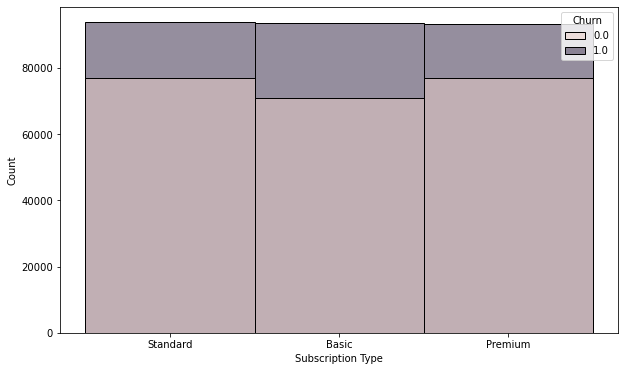

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Subscription Type', bins=10, hue='Churn');

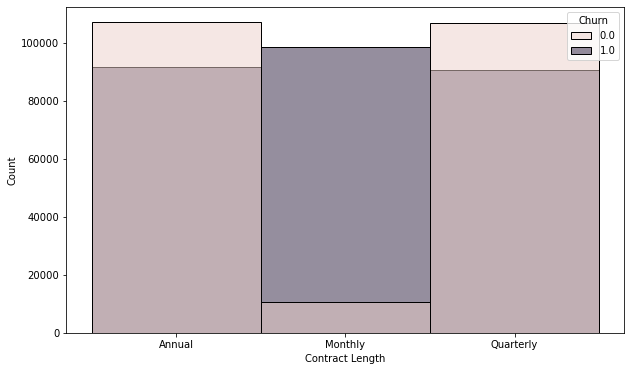

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Contract Length', bins=10, hue='Churn');

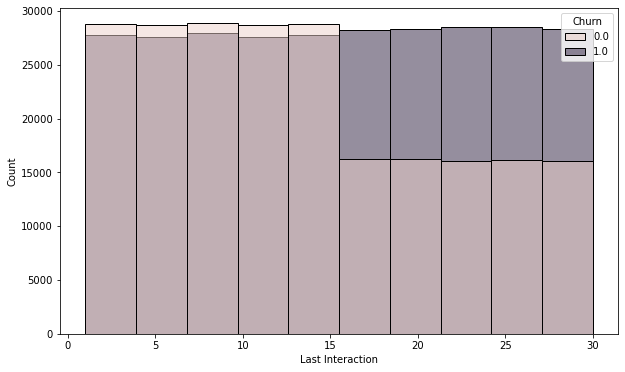

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Last Interaction', bins=10, hue='Churn');

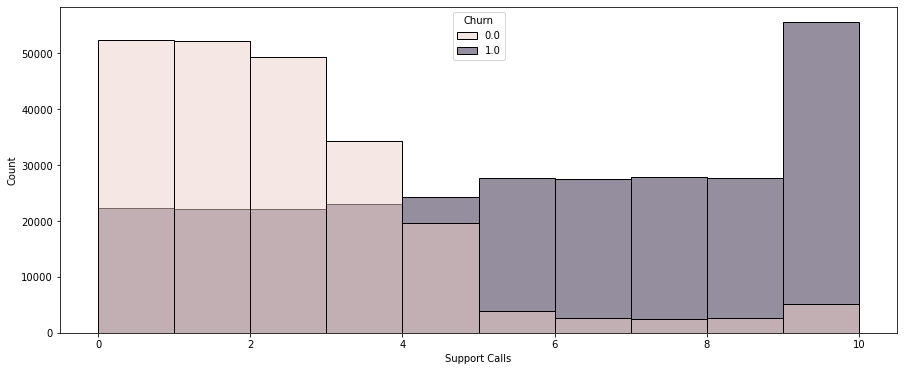

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Support Calls', bins=10, hue='Churn');

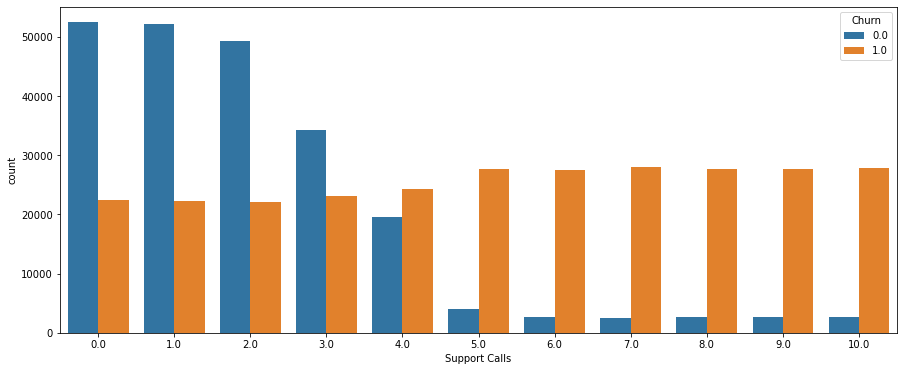

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x="Support Calls" , data=df , hue="Churn");

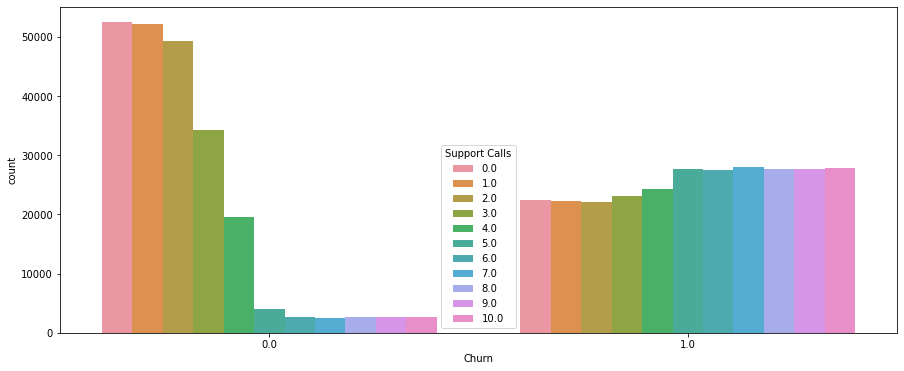

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x="Churn" , data=df , hue="Support Calls");

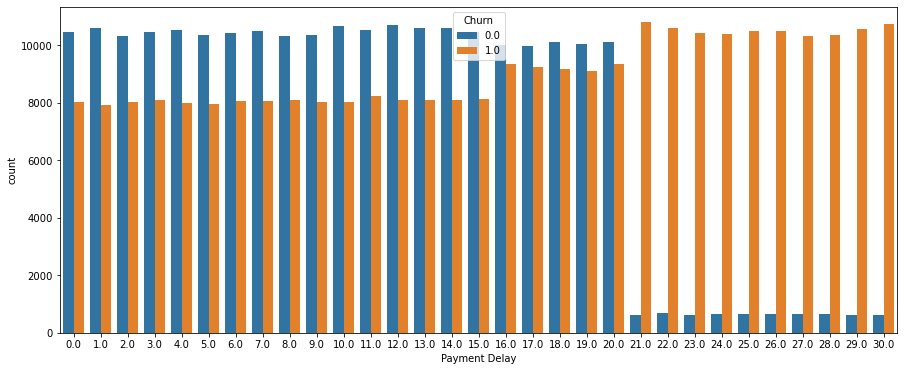

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x="Payment Delay" , data=df , hue="Churn");

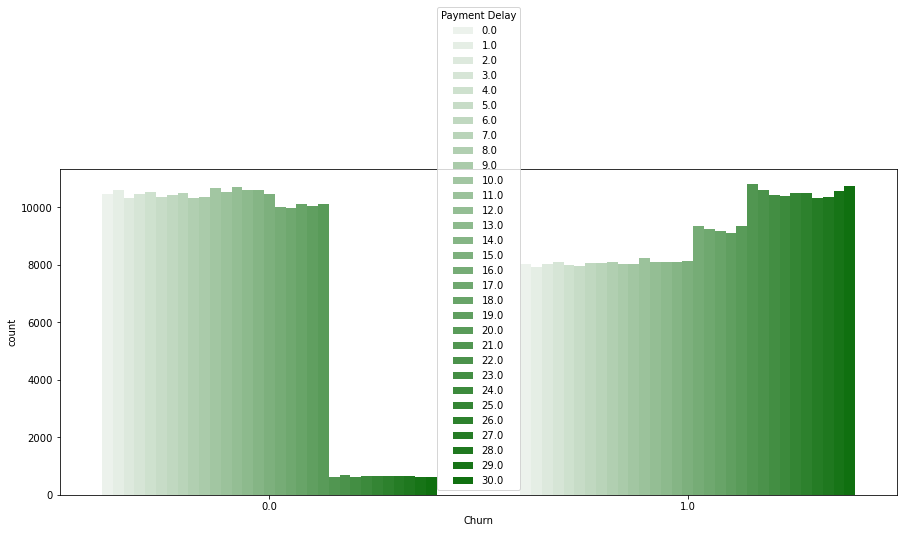

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x="Churn" , data=df , hue="Payment Delay",color='g');

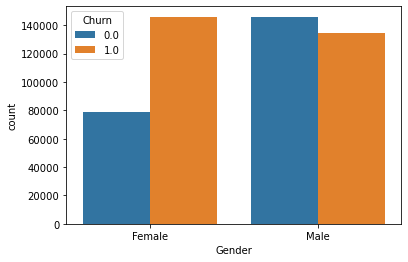

In [27]:
sns.countplot(x="Gender" , data=df , hue="Churn");

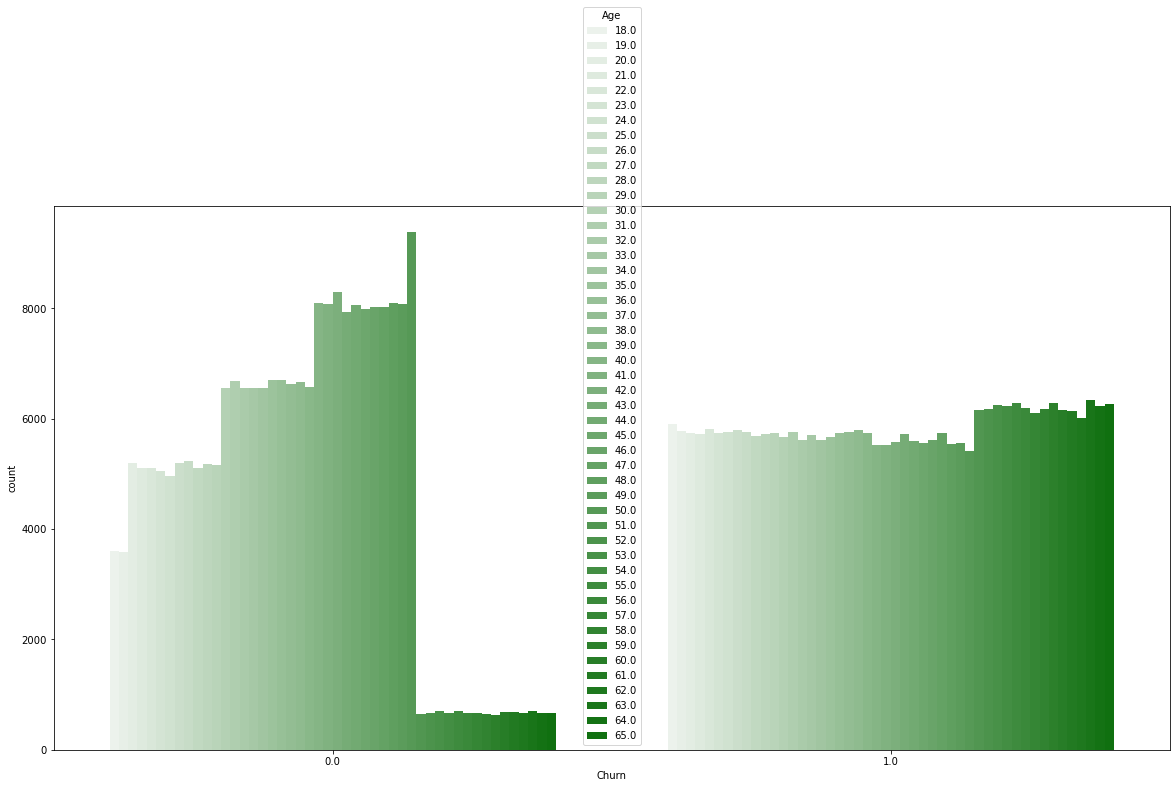

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x="Churn" , data=df , hue="Age",color='g')
plt.show()

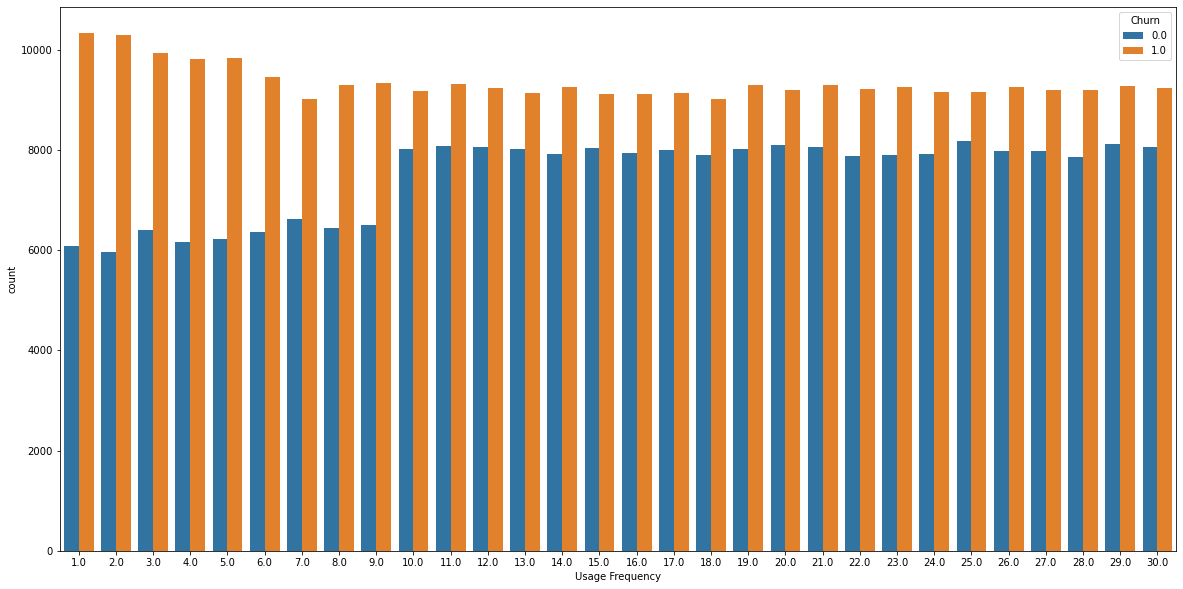

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x="Usage Frequency" , data=df , hue="Churn");

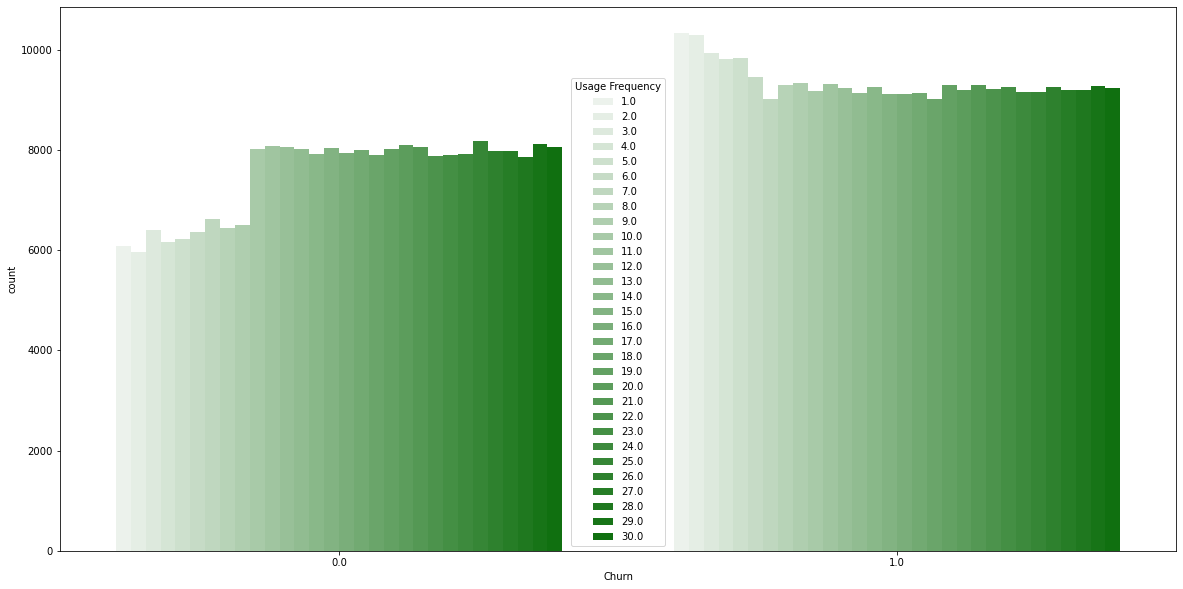

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x="Churn" , data=df , hue="Usage Frequency",color='g')
plt.show()

In [31]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()


def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

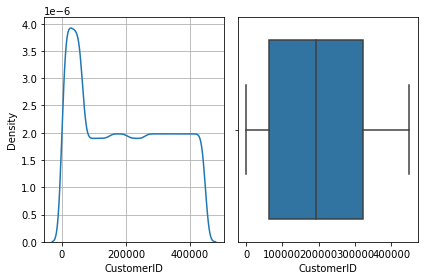

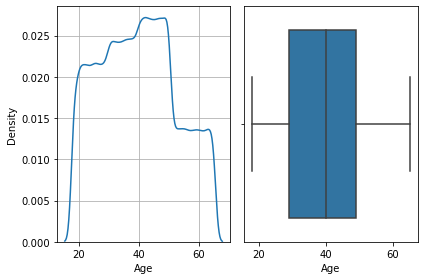

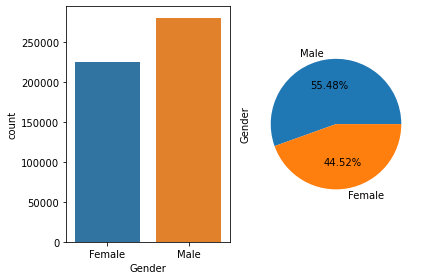

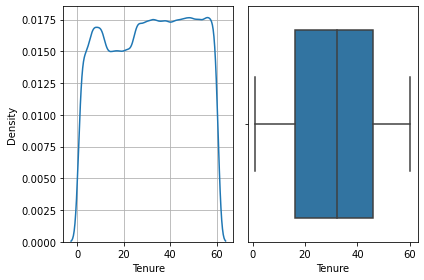

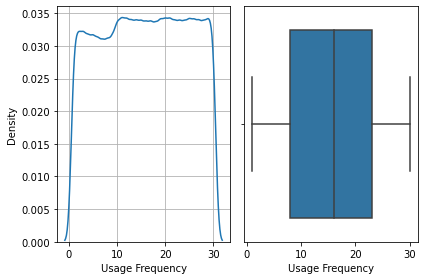

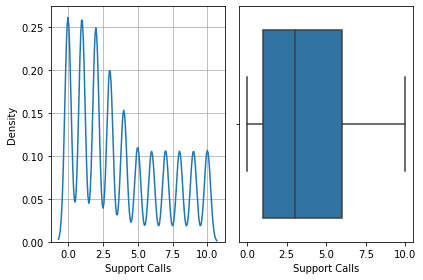

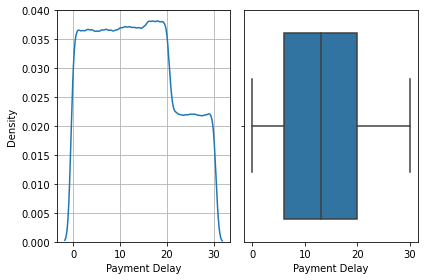

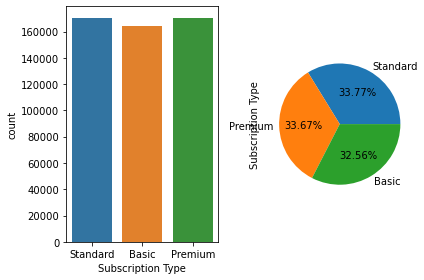

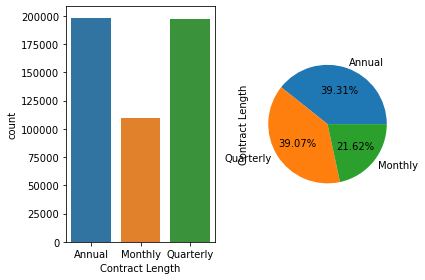

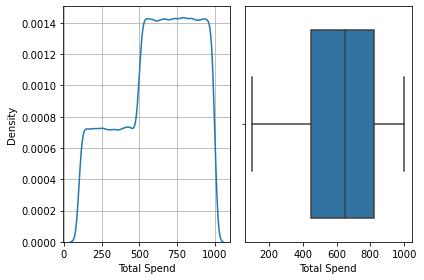

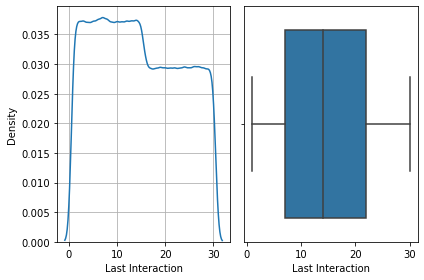

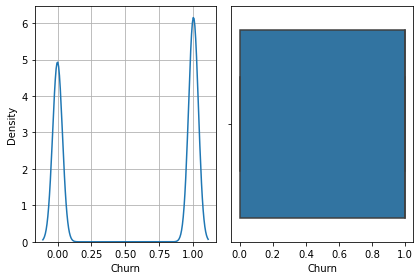

In [32]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [ ]:
df.head(1)

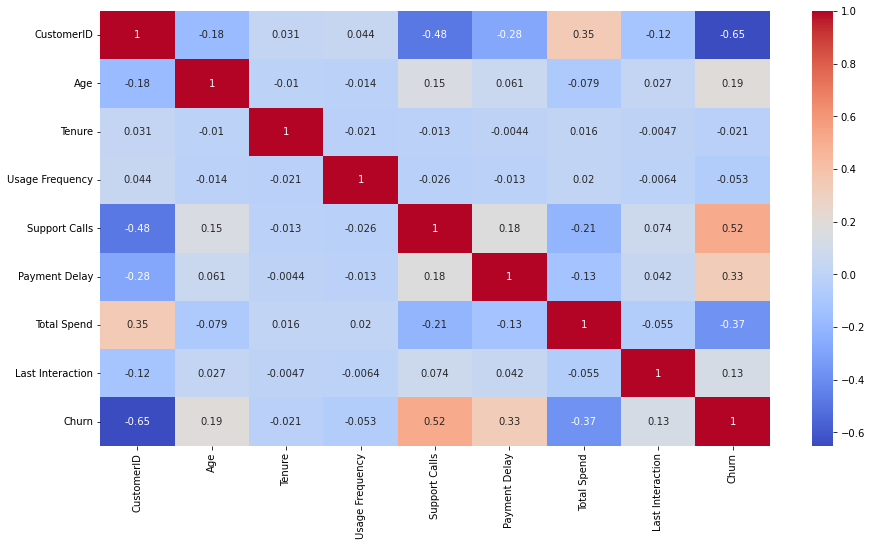

In [33]:
df_corr = df.drop(columns=["Gender", "Subscription Type", "Contract Length"])
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=True);

# Data Processing

In [182]:
df = df.dropna()

In [183]:
for i in df.drop(columns=["Gender","Subscription Type","Contract Length"]).keys():
    df[i]=df[i].astype(int)

In [184]:
X = df.drop(columns=["Churn","CustomerID"], axis= 1)
y = df["Churn"]

In [185]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=.3,shuffle=True , random_state=66)

In [186]:
num_cols = [col for col in  x_train.columns
             if x_train[col].dtype in ['float64', 'int64', 'int32','float32']]

categ_cols = [col for col in  x_train.columns
                if x_train[col].dtype not in ['float64', 'int64', 'int32','float32']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
************************************************************
Categorical Columns : 
 ['Gender', 'Subscription Type', 'Contract Length']


In [187]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', MinMaxScaler())])

categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])


x_train = total_pipeline.fit_transform(x_train)

# Random Forest

In [51]:
forest = RandomForestClassifier(n_estimators=300, max_depth=5, max_leaf_nodes=20,
                                    criterion='gini', max_features=1.0, max_samples=0.8, min_samples_leaf=5,min_samples_split=5,class_weight={0:.7 , 1:.3})
forest.fit(x_train , y_train)

RandomForestClassifier(class_weight={0: 0.6, 1: 0.4}, max_depth=5,
                       max_features=1.0, max_leaf_nodes=20, max_samples=0.8,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300)

## Train Accuracy

In [52]:
y_pred_train_forest = forest.predict(x_train)

In [53]:
class_repo = classification_report(y_train , y_pred_train_forest)
print(class_repo)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90    157226
           1       0.90      0.97      0.93    196418

    accuracy                           0.92    353644
   macro avg       0.92      0.91      0.92    353644
weighted avg       0.92      0.92      0.92    353644



In [54]:
accuracy_score(y_train , y_pred_train_forest)

0.9187629367386411

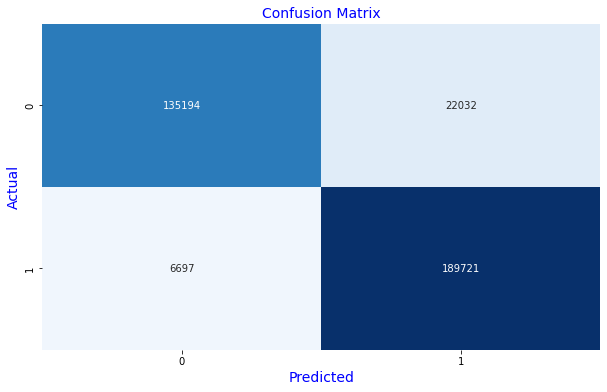

In [55]:
confmat_sgd_2 = confusion_matrix(y_train , y_pred_train_forest)

plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

## Cross-Validation Accuarcy

In [56]:
y_pred_vaild_forest = cross_val_predict(estimator=forest, X=x_train, y=y_train, cv=5, n_jobs=-3)

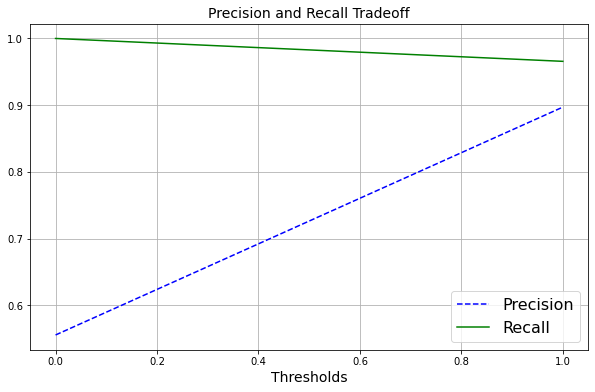

In [57]:
precision_vals, recall_vals, thresholds_vals = precision_recall_curve(y_train, y_pred_vaild_forest)
plt.figure(figsize=(10, 6))
plt.plot(thresholds_vals, precision_vals[:-1], 'b--', label='Precision')
plt.plot(thresholds_vals, recall_vals[:-1], 'g-', label='Recall')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Thresholds', fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [58]:
class_repo = classification_report(y_train , y_pred_vaild_forest)
print(class_repo)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90    157226
           1       0.90      0.97      0.93    196418

    accuracy                           0.92    353644
   macro avg       0.92      0.91      0.92    353644
weighted avg       0.92      0.92      0.92    353644



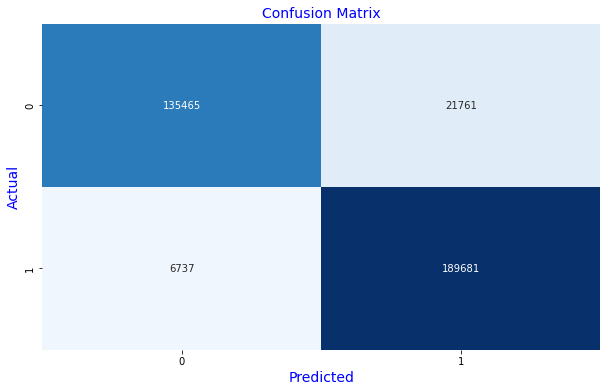

In [60]:
confmat_sgd_2 = confusion_matrix(y_train , y_pred_vaild_forest)


plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [61]:
accuracy_score(y_train , y_pred_vaild_forest)

0.9194161360011763

## Test Accuracy


In [62]:
x_test = total_pipeline.transform(x_test)

In [63]:
y_pred_test_forest = forest.predict(x_test)

In [64]:
class_repo_test = classification_report(y_test , y_pred_test_forest)
print(class_repo_test)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     67488
           1       0.89      0.97      0.93     84074

    accuracy                           0.92    151562
   macro avg       0.92      0.91      0.92    151562
weighted avg       0.92      0.92      0.92    151562



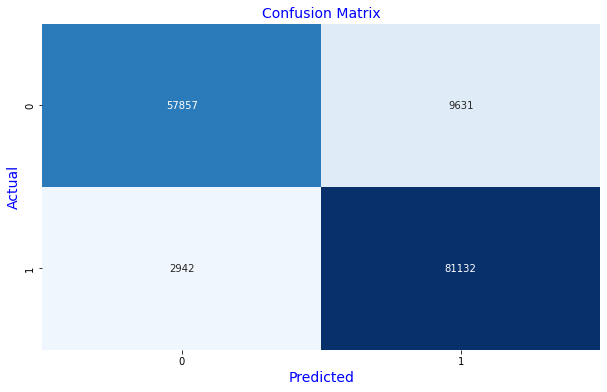

In [65]:
confmat_sgd_2 = confusion_matrix(y_test , y_pred_test_forest)


plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [66]:
accuracy_score(y_test , y_pred_test_forest)

0.9170438500415672

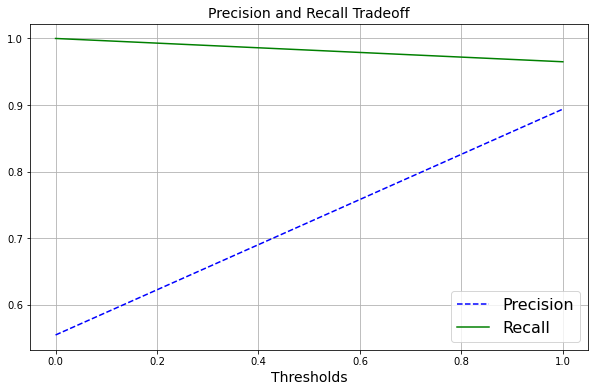

In [67]:
precision_vals, recall_vals, thresholds_vals = precision_recall_curve(y_test, y_pred_test_forest)
plt.figure(figsize=(10, 6))
plt.plot(thresholds_vals, precision_vals[:-1], 'b--', label='Precision')
plt.plot(thresholds_vals, recall_vals[:-1], 'g-', label='Recall')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Thresholds', fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()

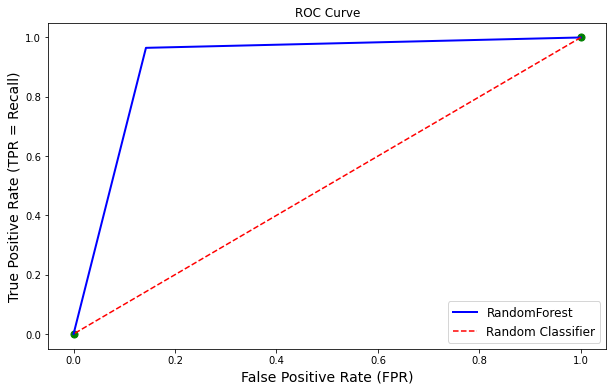

In [68]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_test_forest)


## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='RandomForest')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Logistic Regression

In [179]:
logistic = LogisticRegression(C=5, penalty='l2', max_iter=10000,  solver='lbfgs', class_weight={0:.5 , 1:.5})
logistic.fit(x_train, y_train)

LogisticRegression(C=5, class_weight={0: 0.5, 1: 0.5}, max_iter=10000)

## Train Accuracy

In [180]:
y_pred_train_logistic = logistic.predict(x_train)

In [181]:
class_repo = classification_report(y_train, y_pred_train_logistic)
print(class_repo)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    157226
           1       0.88      0.85      0.86    196418

    accuracy                           0.85    353644
   macro avg       0.85      0.85      0.85    353644
weighted avg       0.85      0.85      0.85    353644



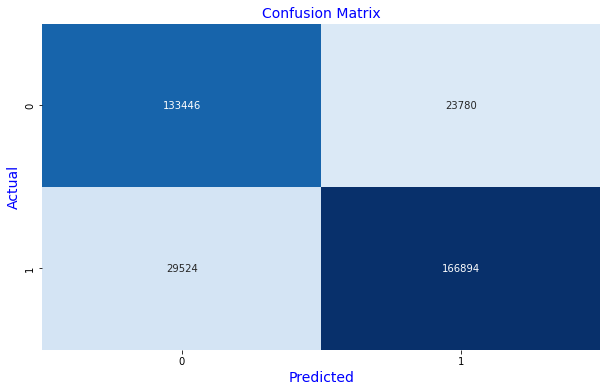

In [157]:
confmat_sgd_2 = confusion_matrix(y_train ,y_pred_train_logistic)

plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [158]:
accuracy_score(y_train , y_pred_train_logistic)

0.8492721493931751

## Cross-Validation Accuarcy

In [174]:
y_pred_vaild_logistic = cross_val_predict(estimator=logistic, X=x_train, y=y_train, cv=5,n_jobs=-2)

In [175]:
class_repo = classification_report(y_train, y_pred_vaild_logistic)
print(class_repo)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    157226
           1       0.88      0.85      0.86    196418

    accuracy                           0.85    353644
   macro avg       0.85      0.85      0.85    353644
weighted avg       0.85      0.85      0.85    353644



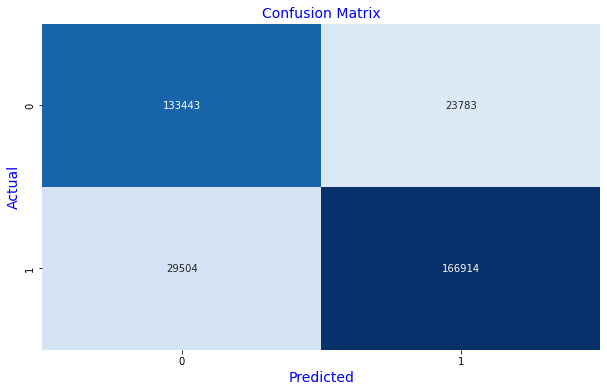

In [161]:
confmat_sgd_2 = confusion_matrix(y_train , y_pred_vaild_logistic)


plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [162]:
accuracy_score(y_train , y_pred_vaild_logistic)

0.8493202203345738

## Testing Accuracy

In [188]:
x_test = total_pipeline.transform(x_test)

In [163]:
y_pred_test_logistic = logistic.predict(x_test)

In [164]:
class_repo = classification_report(y_test, y_pred_test_logistic)
print(class_repo)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     67488
           1       0.87      0.85      0.86     84074

    accuracy                           0.85    151562
   macro avg       0.84      0.85      0.85    151562
weighted avg       0.85      0.85      0.85    151562



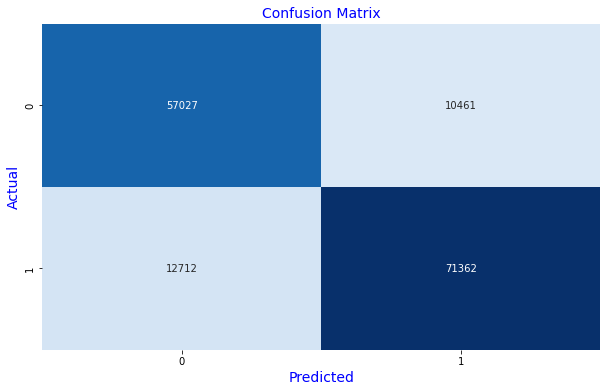

In [165]:
confmat_sgd_2 = confusion_matrix(y_test , y_pred_test_logistic)


plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

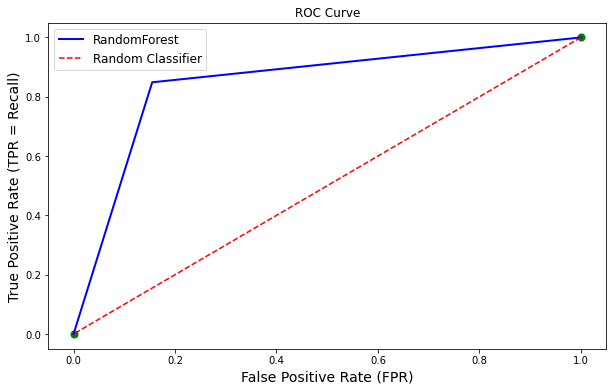

In [166]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_test_logistic)


## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='RandomForest')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [167]:
accuracy_score(y_test , y_pred_test_logistic)

0.847105474987134